**Polycystic ovary syndrome (PCOS)  detection using  CNN**


In [ ]:
# IMPORTING NECESSARY LIBRARIES
#"""COMPUTER VISION FOR HANDLING IMAGES"""
import cv2 
"""The OS module in Python provides functions for interacting with the operating system."""
import os   
"""to connect our google drive"""                                                        
from google.colab import drive                                      
drive.mount('/content/drive')                       
""" for Preprocessing data with TensorFlow Transform"""
import tensorflow as tf  
"""for handling arrays"""                                            
import numpy as np 
"""for handling dataframes"""                                                 
import pandas as pd  
"""for handling visuvalization"""                                             
import matplotlib.pyplot as plt 
"""TO deal with neural network"""                                   
from keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Flatten  
""""The sequential API allows you to create models layer-by-layer  """
from keras.models import Sequential
"""preprocessing is for to prepare the raw data in a format that the network can accept"""
from keras.preprocessing import image

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
"""To generate augmented images dynamically during the training of the model """
train_datagen=image.ImageDataGenerator(rescale=1/255,horizontal_flip=True,zoom_range=0.2,shear_range=0.2)

In [ ]:
"""connecting a directory"""
train_data=train_datagen.flow_from_directory(directory="/content/drive/MyDrive/data (1)/train",target_size=(256,256),batch_size=16,class_mode="binary") 

Found 1921 images belonging to 2 classes.


In [ ]:
"""index value for train data"""
train_data.class_indices

{'infected': 0, 'notinfected': 1}

In [ ]:
"""To generate augmented images dynamically for the testing  """
test_datagen=image.ImageDataGenerator(rescale=1/255)


"""connecting a directory"""
test_data=test_datagen.flow_from_directory(directory="/content/drive/MyDrive/test set",target_size=(256,256),batch_size=16,class_mode="binary") 

Found 819 images belonging to 2 classes.


In [ ]:
test_data.class_indices

{'infected': 0, 'notinfected': 1}

MODEL **BUILDING**

In [ ]:
# convolutional neural network
import keras
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(256,256,3)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(units=64,activation="relu"))
model.add(Dropout(rate=0.50))
model.add(Dense(units=1,activation='sigmoid'))



model.compile(loss=keras.losses.binary_crossentropy,optimizer="adam",metrics=['acc'])


In [ ]:
# fitting the data in the model
model.fit_generator(train_data,steps_per_epoch=8,epochs=10,validation_steps=2,validation_data=test_data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/10
8/8 [==============================] - 101s 10s/step - loss: 1.0333 - acc: 0.4922 - val_loss: 0.6792 - val_acc: 0.6250
Epoch 2/10
8/8 [==============================] - 81s 10s/step - loss: 0.5271 - acc: 0.8281 - val_loss: 0.4733 - val_acc: 0.8750
Epoch 3/10
8/8 [==============================] - 73s 9s/step - loss: 0.4889 - acc: 0.7266 - val_loss: 0.4903 - val_acc: 0.7812
Epoch 4/10
8/8 [==============================] - 71s 9s/step - loss: 0.4313 - acc: 0.8125 - val_loss: 0.4491 - val_acc: 0.8125
Epoch 5/10
8/8 [==============================] - 72s 9s/step - loss: 0.4453 - acc: 0.7891 - val_loss: 0.2824 - val_acc: 0.9062
Epoch 6/10
8/8 [==============================] - 67s 8s/step - loss: 0.2740 - acc: 0.9141 - val_loss: 0.3459 - val_acc: 0.8125
Epoch 7/10
8/8 [==============================] - 69s 8s/step - loss: 0.3366 - acc: 0.8438 - val_loss: 0.2825 - val_acc: 0.8438
Epoch 8/10
8/8 [==============================] - 67s 8s/step - loss: 0.1679 - acc: 0.9297 - val_loss

In [ ]:
# summary of the  model for reference
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 252, 252, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 126, 126, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 124, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                    

In [ ]:
# saving the model
model.save("hello.model")

INFO:tensorflow:Assets written to: hello.model/assets


In [ ]:
# for viewing images
from google.colab.patches import cv2_imshow
# image processing like reading ,resizing ,array conversion using the function
def img(path):
    img_output=cv2.imread(path,cv2.IMREAD_GRAYSCALE)
    cv2_imshow(img_output)
    img_output=cv2.resize(img_output,(384,512))
    img_output=np.array(img_output.reshape(-1,256,256,3))
    return img_output

In [ ]:
# creating list for the categories
category=["THE PERSON IS INFECTED"," THE PERSON IS NOT INFECTED"]

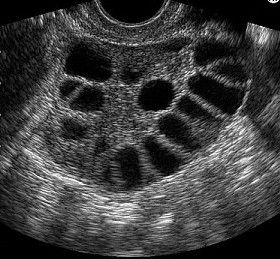



THE PERSON IS INFECTED


In [ ]:
# predicting the output
pred=model.predict(img("/content/drive/MyDrive/data (1)/test/infected/img3.jpg"))
pred=int(pred)
print("\n")
print(category[pred])


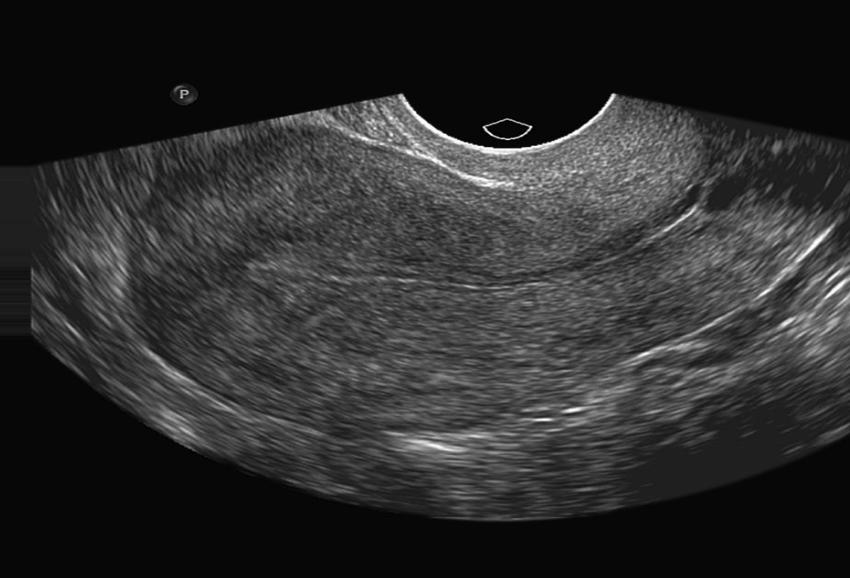



 THE PERSON IS NOT INFECTED


In [ ]:
# predicting the output
pred=model.predict(img("/content/drive/MyDrive/pcos data (1)/notinfected/img_0_103.jpg"))
pred=int(pred)
print("\n")
print(category[pred])
